In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5
import os
import sys
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec
#plt.style.use('/media/labfiles/lab-codes/plotstyle.mplstyle')


In [2]:
exppath = '/media/labfiles/lab-exps/spectro-lab/nano/grating_InP/exp_2022-04/exp_2022_11_04_afm/'
for i,files in enumerate(os.listdir(exppath)):
    print(i,files)

0 test_grating_11_04_1_chopper_Amplitud.txt
1 test_grating_11_04_1_chopper_Amplitud_inic.txt
2 test_grating_11_04_1_chopper.h5


In [3]:
#exps = h5.File(exppath+'test_grating_31_03_1.h5') 
#dset = list(exps.keys())
exps1 = h5.File(exppath+'test_grating_11_04_1_chopper.h5') 
dset1 = list(exps1.keys())


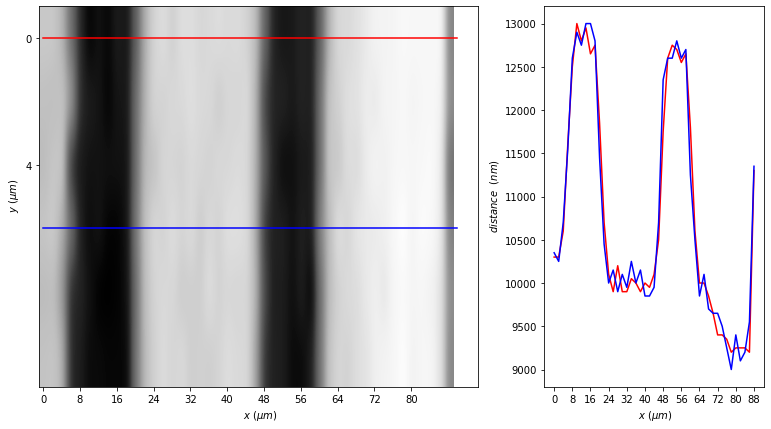

In [4]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=3

ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(exps1[dset1[0]][:].T,cmap='Greys',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(exps1[dset1[0]][:,npix1],'r')
ax2.plot(exps1[dset1[0]][:,npix2],'b')

plt.show()

In [5]:
txtpathInic=exppath+'test_grating_11_04_1_chopper_Amplitud_inic.txt'; txtpath=exppath+'test_grating_11_04_1_chopper_Amplitud.txt'

datInic=np.loadtxt(txtpathInic); datexprAmp=np.loadtxt(txtpath) 

In [6]:
datAmpInic=pd.Series(datInic); 

In [7]:
intVar=np.zeros([45,6])
for j in np.linspace(0,44,45):
    dex=pd.Series(datexprAmp[int(j)])
    leng=np.size(dex)
    ind=0; flag=True; i=0
    while flag:
        if dex[i]==0:
            ind=i
            flag=False
        if i==leng-1:
            flag=False
        i+=1
    if ind!=0:
        ndex=dex[2:int(ind)]
    else:
        ndex=dex[2:]
    
    nlengdex=np.size(ndex)
    ndex=pd.concat([ndex,ndex[nlengdex-100:nlengdex-50]],ignore_index=True)
    ndex=(ndex-ndex.mean())/(ndex.max()+ndex.min())
    dat=ndex.diff()
    tt=dat.nlargest(n=6)
    tt=tt.sort_index()
    numtt=tt.to_numpy()
    intVar[int(j),:]=numtt

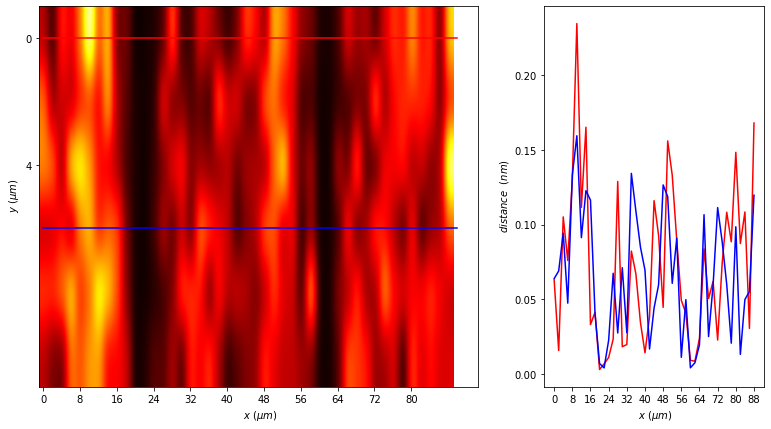

In [8]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])

npix1=0
npix2=3

ax1.set_xlabel(" $x$ $(\mu m)$")
ax1.set_xticks(np.arange(0,44,4))
ax1.set_xticklabels(np.arange(0,88,8))
ax1.set_ylabel(" $y$ $(\mu m)$")
ax1.set_yticks(np.arange(0,4,2))
ax1.set_yticklabels(np.arange(0,8,4))
ax1.imshow(intVar.T,cmap='hot',aspect='auto',interpolation='gaussian')
ax1.plot([0,45],[npix1,npix1],'r')
ax1.plot([0,45],[npix2,npix2],'b')

ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(intVar[:,npix1],'r')
ax2.plot(intVar[:,npix2],'b')

plt.show()

In [9]:
datGrating=exps1[dset1[0]][:].T
ImgGrat=pd.DataFrame(datGrating)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200.0,300.0,100.0,-50.0,150.0,250.0,850.0,-750.0,-50.0,-100.0,...,-100.0,0.0,300.0,100.0,0.0,0.0,-150.0,-50.0,0.0,0.0
2,-250.0,-100.0,150.0,50.0,-100.0,-150.0,-550.0,50.0,250.0,350.0,...,100.0,100.0,0.0,200.0,-200.0,-200.0,200.0,250.0,0.0,0.0
3,-50.0,-200.0,150.0,-50.0,250.0,200.0,100.0,400.0,100.0,-200.0,...,-150.0,50.0,100.0,-450.0,-300.0,-200.0,-200.0,-250.0,-100.0,-50.0
4,550.0,50.0,-50.0,250.0,100.0,-100.0,350.0,1200.0,50.0,50.0,...,0.0,0.0,-150.0,250.0,-100.0,-50.0,0.0,50.0,150.0,150.0
5,-150.0,250.0,250.0,100.0,450.0,50.0,-200.0,-700.0,0.0,100.0,...,250.0,0.0,100.0,0.0,-100.0,300.0,0.0,150.0,-100.0,-300.0
